   Cutoff  TotalExecutionTime  TotalTruePositives  TotalFalsePositives  \
0    0.05              266.23              341282                52590   
1    0.10              285.06              340270                52502   
2    0.15              254.87              335694                52054   
3    0.20              260.11              325678                50688   
4    0.25              252.60              308695                48133   

   TotalFalseNegatives  
0                78660  
1                79672  
2                84248  
3                94264  
4               111247  


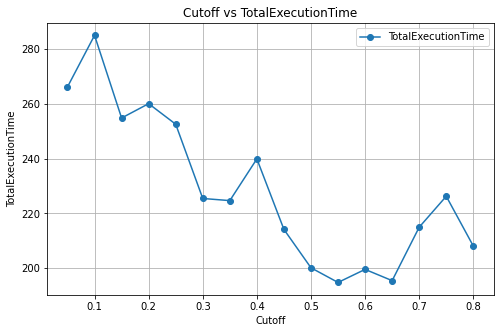

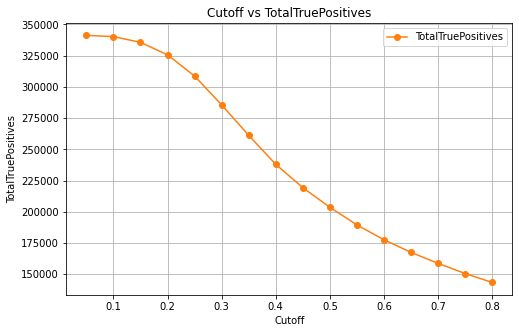

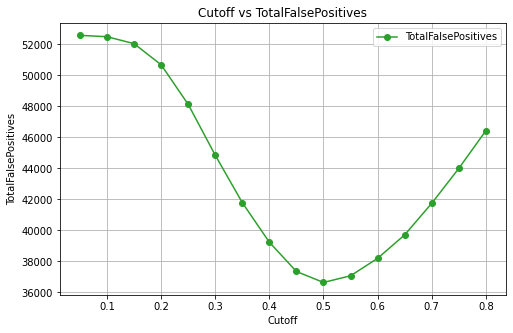

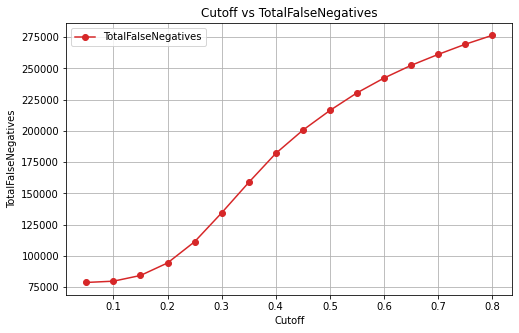

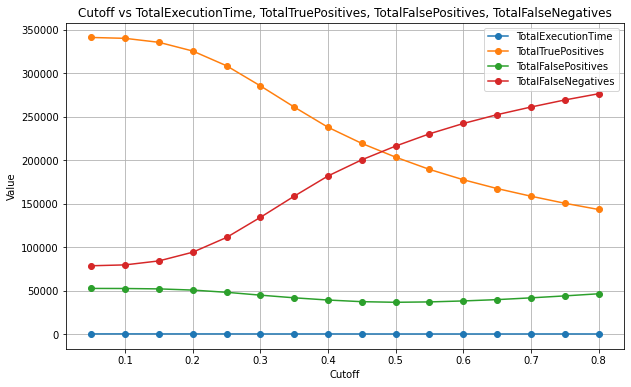

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import cycle

def calculate_precision_f1_recall(tp, fp, fn):
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1_score

def plot_xy(df, x_col, y_col, figsize=(8, 5), marker='o', color=None, xlabel=None, ylabel=None, title=None, show=True):
    xlabel = xlabel or x_col
    ylabel = ylabel or y_col
    title = title or f"{xlabel} vs {ylabel}"
    plt.figure(figsize=figsize)
    plt.plot(df[x_col], df[y_col], marker=marker, color=color, label=y_col)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    if show:
        plt.show()

def plot_each_against_first(df, x_col=None, figsize=(8,5), marker='o', color_cycle=None, show=True):
    if x_col is None:
        x_col = df.columns[0]
    colors = cycle(color_cycle or ['C0','C1','C2','C3','C4','C5'])
    for y_col in df.columns:
        if y_col == x_col:
            continue
        plot_xy(df, x_col, y_col, figsize=figsize, marker=marker, color=next(colors), xlabel=x_col, ylabel=y_col, show=show)

def plot_all_on_one(df, x_col=None, y_cols=None, figsize=(10,6), marker='o', show=True):
    if x_col is None:
        x_col = df.columns[0]
    if y_cols is None:
        y_cols = [c for c in df.columns if c != x_col]
    plt.figure(figsize=figsize)
    for c in y_cols:
        plt.plot(df[x_col], df[c], marker=marker, label=c)
    plt.xlabel(x_col)
    plt.ylabel("Value")
    plt.title(f"{x_col} vs " + ", ".join(y_cols))
    plt.grid(True)
    plt.legend()
    if show:
        plt.show()

def read_and_plot_all(data_file_path, x_col=None, figsize=(8,5), marker='o', plot_single=True, plot_combined=True):
    df = pd.read_csv(data_file_path)
    print(df.head())
    if plot_single:
        plot_each_against_first(df, x_col=x_col, figsize=figsize, marker=marker)
    if plot_combined:
        plot_all_on_one(df, x_col=x_col, figsize=(10,6), marker=marker)
    return df

def compute_precision_recall_f1(df, tp_col='TotalTruePositives', fp_col='TotalFalsePositives', fn_col='TotalFalseNegatives'):
    precision_list, recall_list, f1_list = [], [], []
    for tp, fp, fn in zip(df[tp_col], df[fp_col], df[fn_col]):
        p, r, f1 = calculate_precision_f1_recall(tp, fp, fn)
        precision_list.append(p)
        recall_list.append(r)
        f1_list.append(f1)
    df['Precision'] = precision_list
    df['Recall'] = recall_list
    df['F1'] = f1_list
    return df

# Example usage (uncomment to run):
data_file_path = "../cutoff_experiments_folder/experiment_results.csv"
data = read_and_plot_all(data_file_path)        # reads CSV and plots
data = compute_precision_recall_f1(data)        # adds Precision/Recall/F1 columns
